In [67]:
# Python version 3.12.5

# library imports
import pandas as pd
import numpy as np
import math

#data vizs imports
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
# import data
data_og = pd.read_csv("transformed_dataset.csv")
data_og.head(10)

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,ER,sqfeet/p,price/p,laundry_score,parking_score
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,ca,3,359.333333,382.666667,5,4
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,ca,2,500.500000,600.000000,4,4
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,ca,2,841.500000,906.500000,5,6
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,ca,1,708.000000,1095.000000,5,4
4,reno / tahoe,935,apartment,661,1,1.0,1,1,1,0,0,0,laundry on site,off-street parking,ca,1,661.000000,935.000000,2,3
5,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,ca,1,708.000000,1095.000000,5,4
6,reno / tahoe,1525,apartment,1053,2,2.0,1,1,0,0,0,0,w/d in unit,carport,ca,2,526.500000,762.500000,5,4
7,reno / tahoe,1295,condo,930,2,2.0,0,0,0,0,0,0,w/d in unit,carport,ca,2,465.000000,647.500000,5,4
8,reno / tahoe,2195,house,3115,4,3.0,0,0,0,0,0,0,w/d hookups,attached garage,ca,4,778.750000,548.750000,4,6
9,reno / tahoe,1159,apartment,1181,3,2.0,1,1,1,0,0,0,w/d in unit,carport,ca,3,393.666667,386.333333,5,4


In [69]:
data_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24175 entries, 0 to 24174
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   region                   24175 non-null  object 
 1   price                    24175 non-null  int64  
 2   type                     24175 non-null  object 
 3   sqfeet                   24175 non-null  int64  
 4   beds                     24175 non-null  int64  
 5   baths                    24175 non-null  float64
 6   cats_allowed             24175 non-null  int64  
 7   dogs_allowed             24175 non-null  int64  
 8   smoking_allowed          24175 non-null  int64  
 9   wheelchair_access        24175 non-null  int64  
 10  electric_vehicle_charge  24175 non-null  int64  
 11  comes_furnished          24175 non-null  int64  
 12  laundry_options          24175 non-null  object 
 13  parking_options          24175 non-null  object 
 14  state                 

In [107]:
# drop non-numeric column
data = data_og.drop(['region','type','state', 'laundry_options','parking_options'], axis = 1)
data.head(10)

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,ER,sqfeet/p,price/p,laundry_score,parking_score
0,1148,1078,3,2.0,1,1,0,0,0,0,3,359.333333,382.666667,5,4
1,1200,1001,2,2.0,0,0,0,0,0,0,2,500.500000,600.000000,4,4
2,1813,1683,2,2.0,1,1,1,0,0,0,2,841.500000,906.500000,5,6
3,1095,708,1,1.0,1,1,1,0,0,0,1,708.000000,1095.000000,5,4
4,935,661,1,1.0,1,1,1,0,0,0,1,661.000000,935.000000,2,3
5,1095,708,1,1.0,1,1,1,0,0,0,1,708.000000,1095.000000,5,4
6,1525,1053,2,2.0,1,1,0,0,0,0,2,526.500000,762.500000,5,4
7,1295,930,2,2.0,0,0,0,0,0,0,2,465.000000,647.500000,5,4
8,2195,3115,4,3.0,0,0,0,0,0,0,4,778.750000,548.750000,4,6
9,1159,1181,3,2.0,1,1,1,0,0,0,3,393.666667,386.333333,5,4


# Exploratory Data Analysis

## 1. How do pet policies, parking availability, and furnishing status affect rental pricing?

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24175 entries, 0 to 24174
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    24175 non-null  int64  
 1   sqfeet                   24175 non-null  int64  
 2   beds                     24175 non-null  object 
 3   baths                    24175 non-null  float64
 4   cats_allowed             24175 non-null  int64  
 5   dogs_allowed             24175 non-null  int64  
 6   smoking_allowed          24175 non-null  int64  
 7   wheelchair_access        24175 non-null  int64  
 8   electric_vehicle_charge  24175 non-null  int64  
 9   comes_furnished          24175 non-null  int64  
 10  ER                       24175 non-null  int64  
 11  sqfeet/p                 24175 non-null  float64
 12  price/p                  24175 non-null  float64
 13  laundry_score            24175 non-null  int64  
 14  parking_score         

# cats_allowed vs. price

In [109]:
# convert beds column to string for analysis purposes
cats_data = data.drop(['dogs_allowed','wheelchair_access','electric_vehicle_charge','comes_furnished', 'smoking_allowed'], axis = 1)
cats_data['beds'] = cats_data['beds'].astype(str)

# average/median per cats_allowed and beds
cats_group = (
    cats_data.groupby(['cats_allowed', 'beds'])
        .agg(['mean'])
        .round(2)
)

cats_group.columns = ['_'.join(col) for col in cats_group.columns]
cats_group = cats_group.reset_index()

cats_group = pd.DataFrame(cats_group)
cats_group.head(10)

,cats_allowed,beds,price_mean,sqfeet_mean,baths_mean,ER_mean,sqfeet/p_mean,price/p_mean,laundry_score_mean,parking_score_mean
0,0,0,1193.35,441.97,1.00,1.0,441.97,1193.35,2.24,3.19
1,0,1,1393.19,659.42,1.01,1.0,659.42,1393.19,2.91,3.74
2,0,2,1737.53,987.74,1.48,2.0,493.87,868.76,3.45,4.23
3,0,3,9737.39,1489.50,2.08,3.0,496.50,3245.80,3.96,5.03
4,0,4,2796.83,2231.61,2.56,4.0,557.90,699.21,4.13,5.50
5,0,5,4008.01,3085.64,3.20,5.0,617.13,801.60,4.24,5.40
6,0,6,4681.54,3193.23,3.54,6.0,532.21,780.26,4.31,5.08
7,0,7,13377.78,5500.00,4.78,7.0,785.71,1911.11,4.22,5.56
8,1,0,1729.98,513.86,1.01,1.0,513.86,1729.98,3.07,3.90
9,1,1,1749.86,704.82,1.00,1.0,704.82,1749.86,3.67,4.15


In [45]:
no_cats_group = cats_group[cats_group['cats_allowed'] == 0]
no_cats_group

,cats_allowed,beds,price_mean,sqfeet_mean,baths_mean,ER_mean,sqfeet/p_mean,price/p_mean,laundry_score_mean,parking_score_mean
0,0,0,1193.35,441.97,1.00,1.0,441.97,1193.35,2.24,3.19
1,0,1,1393.19,659.42,1.01,1.0,659.42,1393.19,2.91,3.74
2,0,2,1737.53,987.74,1.48,2.0,493.87,868.76,3.45,4.23
3,0,3,9737.39,1489.50,2.08,3.0,496.50,3245.80,3.96,5.03
4,0,4,2796.83,2231.61,2.56,4.0,557.90,699.21,4.13,5.50
5,0,5,4008.01,3085.64,3.20,5.0,617.13,801.60,4.24,5.40
6,0,6,4681.54,3193.23,3.54,6.0,532.21,780.26,4.31,5.08
7,0,7,13377.78,5500.00,4.78,7.0,785.71,1911.11,4.22,5.56


In [46]:
yes_cats_group = cats_group[cats_group['cats_allowed'] == 1]
yes_cats_group

,cats_allowed,beds,price_mean,sqfeet_mean,baths_mean,ER_mean,sqfeet/p_mean,price/p_mean,laundry_score_mean,parking_score_mean
8,1,0,1729.98,513.86,1.01,1.0,513.86,1729.98,3.07,3.90
9,1,1,1749.86,704.82,1.00,1.0,704.82,1749.86,3.67,4.15
10,1,2,1938.67,1004.24,1.69,2.0,502.12,969.33,3.98,4.27
11,1,3,2439.97,1375.65,2.02,3.0,458.55,813.32,4.47,4.89
12,1,4,2869.90,5453.98,2.58,4.0,1363.50,717.48,4.34,5.51
13,1,5,4150.96,21185.22,3.09,5.0,4237.04,830.19,4.24,5.56
14,1,6,6032.17,4083.67,5.08,6.0,680.61,1005.36,4.33,5.50
15,1,7,2995.00,3000.00,3.00,7.0,428.57,427.86,3.00,6.00


In [47]:
# Differnce (Yes - No)
diff = yes_cats_group.set_index('beds') - no_cats_group.set_index('beds')
diff

,cats_allowed,price_mean,sqfeet_mean,baths_mean,ER_mean,sqfeet/p_mean,price/p_mean,laundry_score_mean,parking_score_mean
beds,,,,,,,,,
0,1,536.63,71.89,0.01,0.0,71.89,536.63,0.83,0.71
1,1,356.67,45.40,-0.01,0.0,45.40,356.67,0.76,0.41
2,1,201.14,16.50,0.21,0.0,8.25,100.57,0.53,0.04
3,1,-7297.42,-113.85,-0.06,0.0,-37.95,-2432.48,0.51,-0.14
4,1,73.07,3222.37,0.02,0.0,805.60,18.27,0.21,0.01
5,1,142.95,18099.58,-0.11,0.0,3619.91,28.59,0.00,0.16
6,1,1350.63,890.44,1.54,0.0,148.40,225.10,0.02,0.42
7,1,-10382.78,-2500.00,-1.78,0.0,-357.14,-1483.25,-1.22,0.44


/var/folders/49/mhn1mqtj6x5fg36szsq9bkxw0000gq/T/ipykernel_4092/3281514511.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='beds', y='price_mean', data=diff_reset, palette='coolwarm')


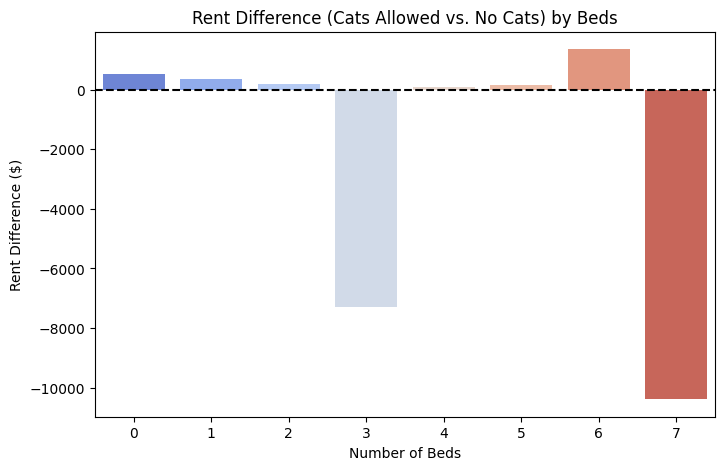

In [121]:
# Bar Plot - Rent Difference (Cats. vs. No Cats)

# Reset index so 'beds' is a column
diff_reset = diff.reset_index()

# Bar plot for rent_mean difference
plt.figure(figsize=(8,5))
sns.barplot(x='beds', y='price_mean', data=diff_reset, palette='coolwarm')
plt.axhline(0, color='black', linestyle='--')
plt.title('Rent Difference (Cats Allowed vs. No Cats) by Beds')
plt.ylabel('Rent Difference ($)')
plt.xlabel('Number of Beds')
plt.show()


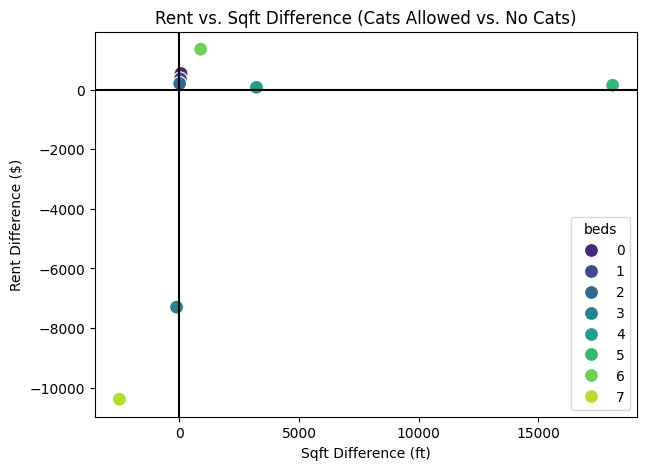

In [120]:
# Scattter Plot - Rent vs. Sqft

plt.figure(figsize=(7,5))
sns.scatterplot(x='sqfeet_mean', y='price_mean', hue='beds', data=diff_reset, palette='viridis', s=100)
plt.axhline(0, color='black', linestyle='-')
plt.axvline(0, color='black', linestyle='-')
plt.title('Rent vs. Sqft Difference (Cats Allowed vs. No Cats)')
plt.xlabel('Sqft Difference (ft)')
plt.ylabel('Rent Difference ($)')
plt.show()

### Takeaway:
- units that allow cats typically make more money than units that do not allow cats.
- there might be a few outliers in the data (bd. 3 and bed 7)


# dogs_allowed vs. price

In [62]:
# convert beds column to string for analysis purposes
dogs_data = data.drop(['cats_allowed','wheelchair_access','electric_vehicle_charge','comes_furnished', 'smoking_allowed'], axis = 1)
dogs_data['beds'] = dogs_data['beds'].astype(str)

# average/median per cats_allowed and beds
dogs_group = (
    dogs_data.groupby(['dogs_allowed', 'beds'])
        .agg(['mean'])
        .round(2)
)

dogs_group.columns = ['_'.join(col) for col in dogs_group.columns]
dogs_group = dogs_group.reset_index()

dogs_group = pd.DataFrame(dogs_group)
dogs_group.head()

,dogs_allowed,beds,price_mean,sqfeet_mean,baths_mean,ER_mean,sqfeet/p_mean,price/p_mean,laundry_score_mean,parking_score_mean
0,0,0,1244.16,449.01,1.00,1.0,449.01,1244.16,2.27,3.22
1,0,1,1464.97,660.35,1.00,1.0,660.35,1464.97,2.88,3.74
2,0,2,1751.02,977.11,1.48,2.0,488.55,875.51,3.37,4.19
3,0,3,10018.38,1478.33,2.08,3.0,492.78,3339.46,3.91,5.00
4,0,4,2760.53,2205.56,2.54,4.0,551.39,690.13,4.14,5.48


In [63]:
no_dogs_group = dogs_group[dogs_group['dogs_allowed'] == 0]

yes_dogs_group = dogs_group[dogs_group['dogs_allowed'] == 1]

# Differnce (Yes - No)
dogs_diff = yes_dogs_group.set_index('beds') - no_dogs_group.set_index('beds')
dogs_diff

,dogs_allowed,price_mean,sqfeet_mean,baths_mean,ER_mean,sqfeet/p_mean,price/p_mean,laundry_score_mean,parking_score_mean
beds,,,,,,,,,
0,1,500.85,66.75,0.01,0.0,66.75,500.85,0.84,0.72
1,1,281.97,47.07,0.00,0.0,47.07,281.97,0.85,0.43
2,1,190.90,31.34,0.21,0.0,15.67,95.45,0.66,0.09
3,1,-7586.84,-94.74,-0.05,0.0,-31.58,-2528.95,0.58,-0.09
4,1,145.93,2890.15,0.07,0.0,722.54,36.49,0.16,0.05
5,1,2.93,16801.27,-0.15,0.0,3360.25,0.58,0.00,0.08
6,1,1350.63,890.44,1.54,0.0,148.40,225.10,0.02,0.42
7,1,-10382.78,-2500.00,-1.78,0.0,-357.14,-1483.25,-1.22,0.44


/var/folders/49/mhn1mqtj6x5fg36szsq9bkxw0000gq/T/ipykernel_4092/3994125089.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='beds', y='price_mean', data=dogs_diff_reset, palette='coolwarm')


Text(0.5, 0, 'Number of Beds')

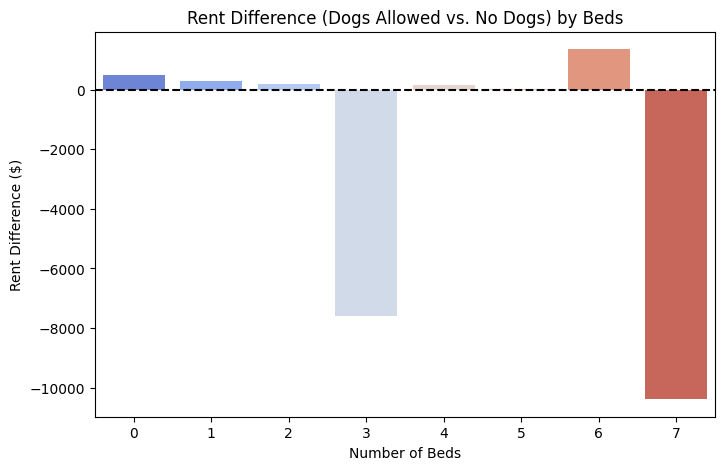

In [118]:
# Bar Plot - Rent Difference (Dogs. vs. No Dogs)

# Reset index so 'beds' is a column
dogs_diff_reset = dogs_diff.reset_index()

# Bar plot for rent_mean difference
plt.figure(figsize=(8,5))
sns.barplot(x='beds', y='price_mean', data=dogs_diff_reset, palette='coolwarm')
plt.axhline(0, color='black', linestyle='--')
plt.title('Rent Difference (Dogs Allowed vs. No Dogs) by Beds')
plt.ylabel('Rent Difference ($)')
plt.xlabel('Number of Beds')

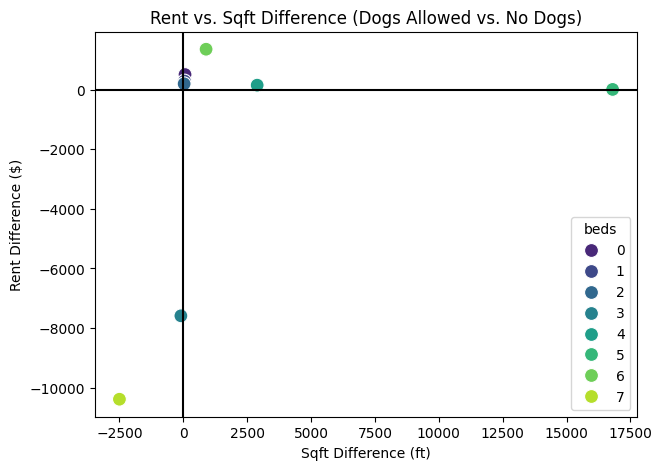

In [122]:
# Scattter Plot - Rent vs. Sqft

plt.figure(figsize=(7,5))
sns.scatterplot(x='sqfeet_mean', y='price_mean', hue='beds', data=dogs_diff_reset, palette='viridis', s=100)
plt.axhline(0, color='black', linestyle='-')
plt.axvline(0, color='black', linestyle='-')
plt.title('Rent vs. Sqft Difference (Dogs Allowed vs. No Dogs)')
plt.xlabel('Sqft Difference (ft)')
plt.ylabel('Rent Difference ($)')
plt.show()

### Takeaway:
- units that allow dogs typically make more money than units that do not allow dogs. 
- similar results to cats
- units that allow pets cost more money

# parking_options vs. price

In [110]:
parking_data = data_og.drop(['region','type','state', 'laundry_options','cats_allowed','dogs_allowed','wheelchair_access','electric_vehicle_charge','comes_furnished','smoking_allowed'], axis = 1)
parking_data['beds'] = parking_data['beds'].astype(str)

parking_data.head(10)

,price,sqfeet,beds,baths,parking_options,ER,sqfeet/p,price/p,laundry_score,parking_score
0,1148,1078,3,2.0,carport,3,359.333333,382.666667,5,4
1,1200,1001,2,2.0,carport,2,500.500000,600.000000,4,4
2,1813,1683,2,2.0,attached garage,2,841.500000,906.500000,5,6
3,1095,708,1,1.0,carport,1,708.000000,1095.000000,5,4
4,935,661,1,1.0,off-street parking,1,661.000000,935.000000,2,3
5,1095,708,1,1.0,carport,1,708.000000,1095.000000,5,4
6,1525,1053,2,2.0,carport,2,526.500000,762.500000,5,4
7,1295,930,2,2.0,carport,2,465.000000,647.500000,5,4
8,2195,3115,4,3.0,attached garage,4,778.750000,548.750000,4,6
9,1159,1181,3,2.0,carport,3,393.666667,386.333333,5,4


In [111]:
# average/median per parking options
parking_group = (
    parking_data
      .groupby('parking_options')
      .mean(numeric_only=True)   # ignores non-numeric automatically
      .round(2)
      .reset_index()
)

parking_group.head()

,parking_options,price,sqfeet,baths,ER,sqfeet/p,price/p,laundry_score,parking_score
0,attached garage,2459.72,1817.49,1.95,2.51,676.45,1173.42,4.43,6.0
1,carport,2485.22,873.92,1.39,1.71,551.06,1370.05,3.61,4.0
2,detached garage,2239.39,1042.62,1.63,1.93,578.80,1348.34,4.37,5.0
3,no parking,1877.65,633.88,1.09,1.40,461.78,1409.41,2.84,1.0
4,off-street parking,1899.53,889.24,1.35,1.71,545.81,1228.48,3.21,3.0


/var/folders/49/mhn1mqtj6x5fg36szsq9bkxw0000gq/T/ipykernel_4092/1898410642.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parking_options', y='price', data=parking_group, palette='viridis')


Text(0.5, 0, 'Parking Options')

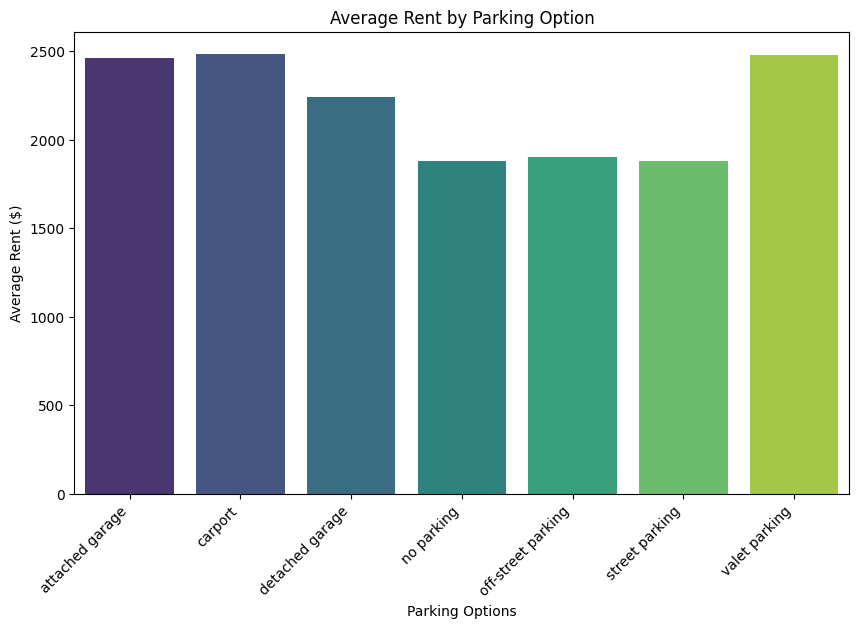

In [124]:
# Bar Plot - Average Rent by Parking Option

plt.figure(figsize=(10,6))
sns.barplot(x='parking_options', y='price', data=parking_group, palette='viridis')

plt.xticks(rotation=45, ha='right') 
plt.title('Average Rent by Parking Option')
plt.ylabel('Average Rent ($)')
plt.xlabel('Parking Options')
plt.show()

### Takeaway:
- units that offer parking have a higher average rent price than units that do not offer parking. 

# comes_furnished vs. price

In [92]:
furnished_data = data_og.drop(['region','type','state', 'laundry_options','cats_allowed','dogs_allowed','wheelchair_access','electric_vehicle_charge','parking_options','smoking_allowed'], axis = 1)

furnished_data['beds'] = furnished_data['beds'].astype(str)

furnished_data.head(25)

,price,sqfeet,beds,baths,comes_furnished,ER,sqfeet/p,price/p,laundry_score,parking_score
0,1148,1078,3,2.0,0,3,359.333333,382.666667,5,4
1,1200,1001,2,2.0,0,2,500.500000,600.000000,4,4
2,1813,1683,2,2.0,0,2,841.500000,906.500000,5,6
3,1095,708,1,1.0,0,1,708.000000,1095.000000,5,4
4,935,661,1,1.0,0,1,661.000000,935.000000,2,3
5,1095,708,1,1.0,0,1,708.000000,1095.000000,5,4
6,1525,1053,2,2.0,0,2,526.500000,762.500000,5,4
7,1295,930,2,2.0,0,2,465.000000,647.500000,5,4
8,2195,3115,4,3.0,0,4,778.750000,548.750000,4,6
9,1159,1181,3,2.0,0,3,393.666667,386.333333,5,4


In [94]:
# average/median per parking options
furnished_group = (
    furnished_data
      .groupby('comes_furnished')
      .mean(numeric_only=True)   # ignores non-numeric automatically
      .round(2)
      .reset_index()
)

furnished_group.head()

,comes_furnished,price,sqfeet,baths,ER,sqfeet/p,price/p,laundry_score,parking_score
0,0,2351.89,989.55,1.51,1.88,556.84,1305.23,3.78,4.34
1,1,2577.86,3337.44,1.66,2.05,1075.31,1424.18,3.98,4.23


/var/folders/49/mhn1mqtj6x5fg36szsq9bkxw0000gq/T/ipykernel_4092/3607311440.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='comes_furnished', y='price', data=furnished_group, palette='coolwarm')


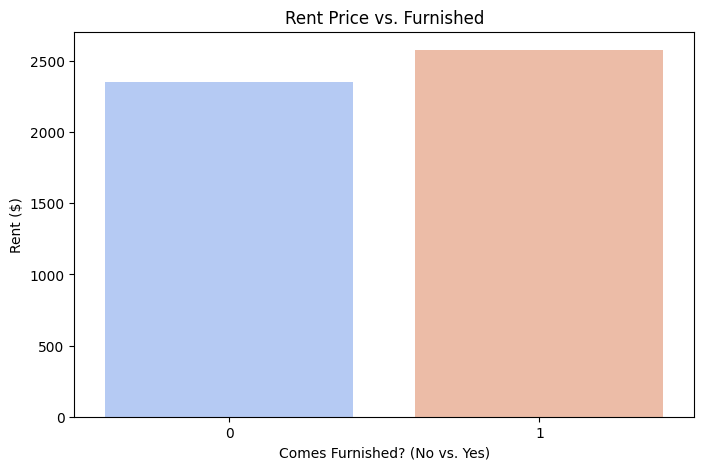

In [126]:
# Bar Plot - Rent Price vs. Furnished

# Bar plot for rent_mean difference
plt.figure(figsize=(8,5))
sns.barplot(x='comes_furnished', y='price', data=furnished_group, palette='coolwarm')
plt.title('Rent Price vs. Furnished')
plt.ylabel('Rent ($)')
plt.xlabel('Comes Furnished? (No vs. Yes)')
plt.show()

### Takeaway:
- furnished units are more money, but not by much.

######### NEXT STEPS ##########

## 2. Are there regional disparities in rental affordability based on property characteristics?

In [ ]:
# region vs. price

# region/laundry_score vs. price

# region / parking_score vs. price

# region /cats/dogs vs. price

## 3. How does the presence of accessibility features correlate with price and location?

In [ ]:
# wheelchair_access vs. price

# region/wheelchair_access vs. price